TensorFlow version: 2.19.0

=== Generating Synthetic Traffic Data ===
Generated 200 frames of traffic data
Vehicle count range: 1 to 27


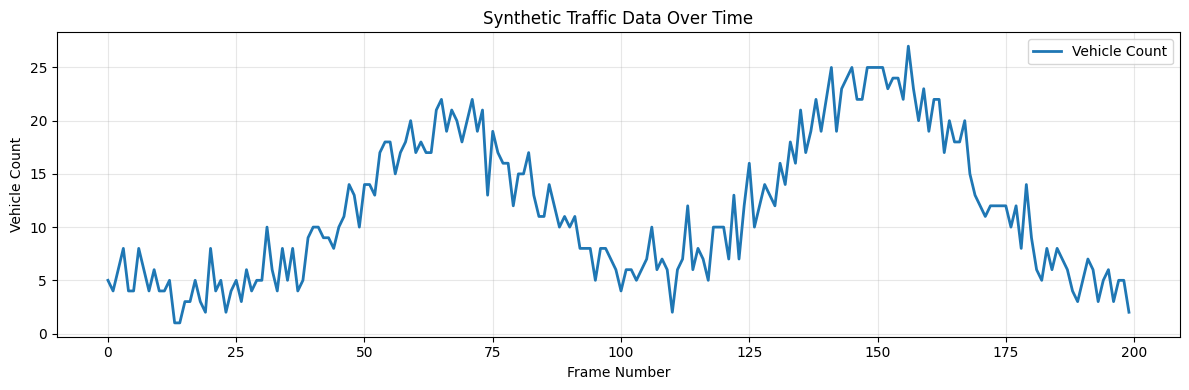


=== Dataset Prepared ===
Training sequences: 152
Testing sequences: 38
Sequence length: 10

=== Building LSTM Model ===


Model: "Traffic_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 10, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,857 (116.63 KB)

 Trainable params: 29,857 (116.63 KB)

 Non-trainable params: 0 (0.00 B)


=== Training LSTM Model ===
Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 110.5953 - mae: 8.9836 - val_loss: 330.0734 - val_mae: 17.8860
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 49.3529 - mae: 5.3649 - val_loss: 225.4241 - val_mae: 14.6719
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 39.3997 - mae: 4.9453 - val_loss: 153.9444 - val_mae: 11.9945
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 35.5141 - mae: 4.9406 - val_loss: 129.7045 - val_mae: 10.9455
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 26.5651 - mae: 4.2801 - val_loss: 135.7325 - val_mae: 11.2333
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 25.0073 - mae: 4.0896 - val_loss: 121.2540 - val_mae: 10.5789
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 19.1133 - mae: 3.3666 - val_loss: 92.2437 - val_mae: 9.0823
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.0454 - mae: 2.6307 - val_loss: 70.3033 - val_mae: 7.8038
Epoch 

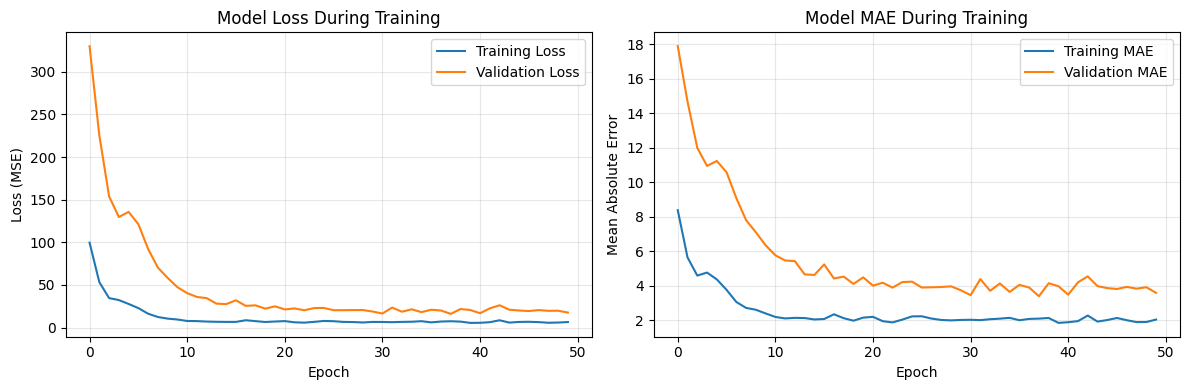


=== Making Predictions ===
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 304ms/step
Test MSE: 6.02
Test MAE: 1.95
Test R² Score: 0.79


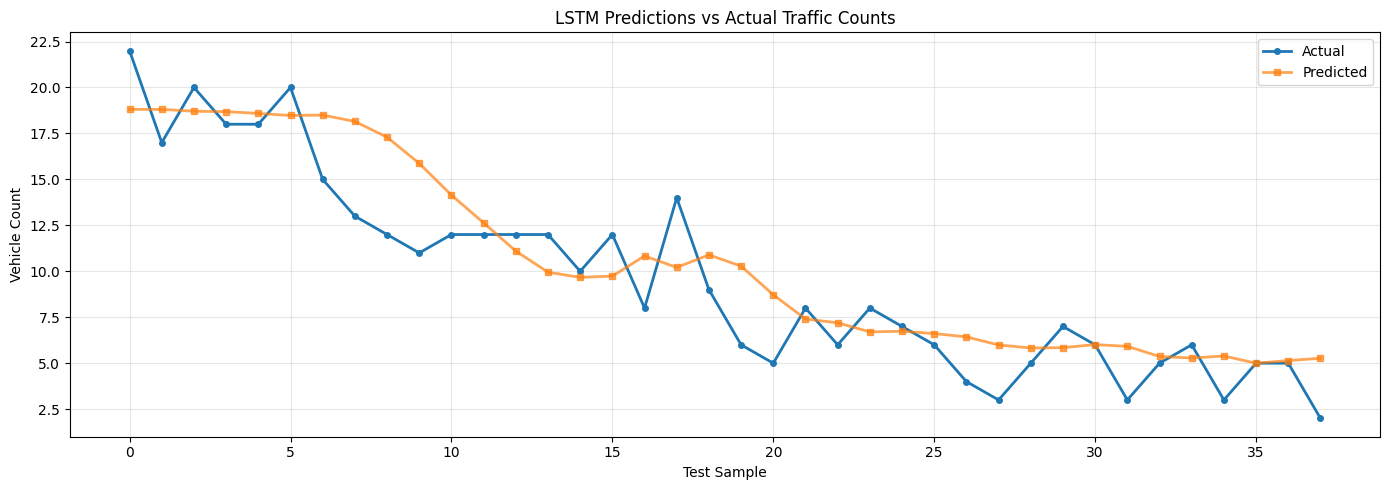


=== Future Traffic Predictions ===
Frame +1: 4 vehicles
Frame +2: 4 vehicles
Frame +3: 4 vehicles
Frame +4: 4 vehicles
Frame +5: 4 vehicles


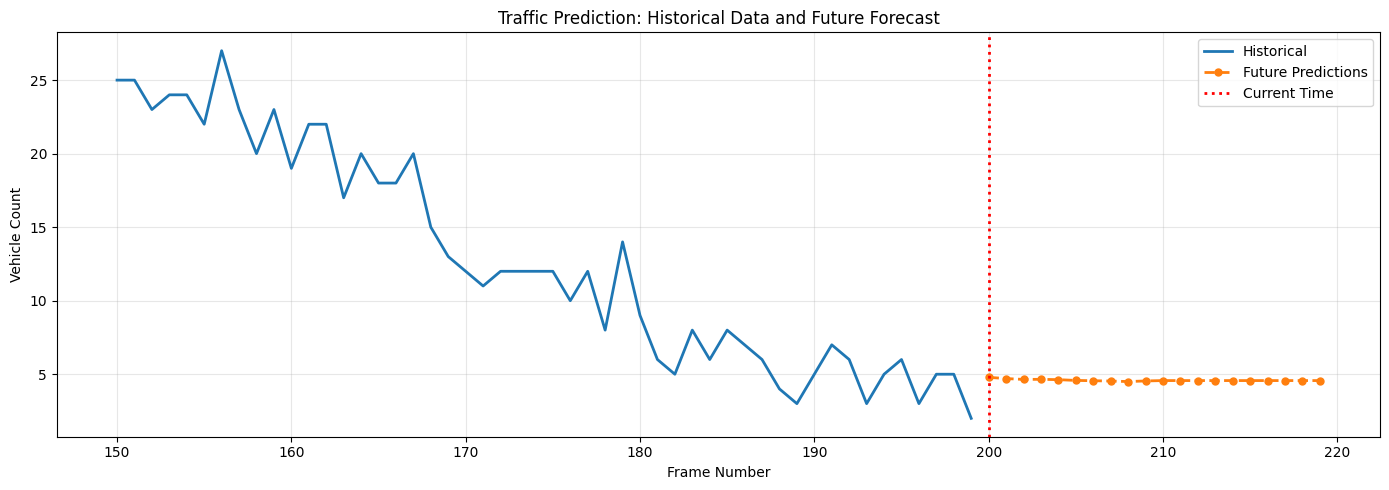


=== Traffic Alert System ===

Frame +1:
  Status: 🟢 LOW
  Predicted Vehicles: 4
  Message: Traffic is light. Good time to travel!
  Action: No action needed.

Frame +2:
  Status: 🟢 LOW
  Predicted Vehicles: 4
  Message: Traffic is light. Good time to travel!
  Action: No action needed.

Frame +3:
  Status: 🟢 LOW
  Predicted Vehicles: 4
  Message: Traffic is light. Good time to travel!
  Action: No action needed.

Frame +4:
  Status: 🟢 LOW
  Predicted Vehicles: 4
  Message: Traffic is light. Good time to travel!
  Action: No action needed.

Frame +5:
  Status: 🟢 LOW
  Predicted Vehicles: 4
  Message: Traffic is light. Good time to travel!
  Action: No action needed.


=== Saving Model ===
Model saved as 'traffic_lstm_model.h5'
Model saved as 'traffic_lstm_model.keras' (Keras format)

✅ Project Complete! ✅

Key Features Implemented:
1. ✓ Synthetic traffic data generation
2. ✓ LSTM model built from scratch
3. ✓ Time series prediction with sliding window
4. ✓ Future traffic forecasting
5.

In [2]:
"""
Smart Traffic Video Analyzer with LSTM + Transformer

"""

# Step 1: Install Dependencies

"""
!pip install opencv-python-headless matplotlib numpy pandas
!pip install tensorflow
!pip install imageio imageio-ffmpeg
"""

import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

print("TensorFlow version:", tf.__version__)

# ============================================
# Part 1: Generate Synthetic Traffic Data
# ============================================

def generate_synthetic_traffic_data(num_frames=200):
    """
    Generate synthetic vehicle count data that simulates traffic patterns
    """
    np.random.seed(42)

    # Create realistic traffic pattern: morning rush, lunch dip, evening rush
    time_of_day = np.linspace(0, 24, num_frames)

    # Base traffic pattern (sinusoidal with two peaks)
    morning_rush = 15 * np.exp(-((time_of_day - 8)**2) / 8)
    evening_rush = 20 * np.exp(-((time_of_day - 18)**2) / 8)
    base_traffic = 5 + morning_rush + evening_rush

    # Add random noise
    noise = np.random.normal(0, 2, num_frames)
    vehicle_counts = np.maximum(0, base_traffic + noise).astype(int)

    return vehicle_counts

# Generate synthetic data
print("\n=== Generating Synthetic Traffic Data ===")
vehicle_counts = generate_synthetic_traffic_data(200)
print(f"Generated {len(vehicle_counts)} frames of traffic data")
print(f"Vehicle count range: {vehicle_counts.min()} to {vehicle_counts.max()}")

# Visualize the data
plt.figure(figsize=(12, 4))
plt.plot(vehicle_counts, label='Vehicle Count', linewidth=2)
plt.title('Synthetic Traffic Data Over Time')
plt.xlabel('Frame Number')
plt.ylabel('Vehicle Count')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================
# Part 2: Prepare LSTM Dataset
# ============================================

def create_sequences(data, seq_length):
    """Create sequences for time series prediction"""
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Create sequences
SEQ_LENGTH = 10
X, y = create_sequences(vehicle_counts, SEQ_LENGTH)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split into train and test
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

print(f"\n=== Dataset Prepared ===")
print(f"Training sequences: {X_train.shape[0]}")
print(f"Testing sequences: {X_test.shape[0]}")
print(f"Sequence length: {SEQ_LENGTH}")

# ============================================
# Part 3: Build LSTM Model from Scratch
# ============================================

print("\n=== Building LSTM Model ===")

lstm_model = Sequential([
    LSTM(64, input_shape=(SEQ_LENGTH, 1), return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)
], name='Traffic_LSTM')

lstm_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

lstm_model.summary()

# ============================================
# Part 4: Train the Model
# ============================================

print("\n=== Training LSTM Model ===")

history = lstm_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=8,
    validation_split=0.2,
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE During Training')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================
# Part 5: Make Predictions
# ============================================

print("\n=== Making Predictions ===")

# Predict on test set
y_pred = lstm_model.predict(X_test)

# Calculate metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.2f}")
print(f"Test MAE: {mae:.2f}")
print(f"Test R² Score: {r2:.2f}")

# Visualize predictions
plt.figure(figsize=(14, 5))
plt.plot(y_test, label='Actual', marker='o', markersize=4, linewidth=2)
plt.plot(y_pred, label='Predicted', marker='s', markersize=4, linewidth=2, alpha=0.7)
plt.title('LSTM Predictions vs Actual Traffic Counts')
plt.xlabel('Test Sample')
plt.ylabel('Vehicle Count')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================
# Part 6: Predict Next N Frames
# ============================================

def predict_future_traffic(model, last_sequence, n_future=10):
    """Predict future traffic for next n frames"""
    predictions = []
    current_sequence = last_sequence.copy()

    for _ in range(n_future):
        # Predict next value
        next_pred = model.predict(current_sequence, verbose=0)
        predictions.append(next_pred[0, 0])

        # Update sequence (sliding window)
        current_sequence = np.roll(current_sequence, -1)
        current_sequence[0, -1, 0] = next_pred[0, 0]

    return np.array(predictions)

# Predict next 20 frames
last_sequence = vehicle_counts[-SEQ_LENGTH:].reshape(1, SEQ_LENGTH, 1)
future_predictions = predict_future_traffic(lstm_model, last_sequence, n_future=20)

print(f"\n=== Future Traffic Predictions ===")
for i, pred in enumerate(future_predictions[:5], 1):
    print(f"Frame +{i}: {int(pred)} vehicles")

# Visualize future predictions
plt.figure(figsize=(14, 5))
historical_range = range(len(vehicle_counts) - 50, len(vehicle_counts))
future_range = range(len(vehicle_counts), len(vehicle_counts) + len(future_predictions))

plt.plot(historical_range, vehicle_counts[-50:], label='Historical', linewidth=2)
plt.plot(future_range, future_predictions, label='Future Predictions',
         linewidth=2, linestyle='--', marker='o', markersize=5)
plt.axvline(len(vehicle_counts), color='red', linestyle=':', linewidth=2, label='Current Time')
plt.title('Traffic Prediction: Historical Data and Future Forecast')
plt.xlabel('Frame Number')
plt.ylabel('Vehicle Count')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================
# Part 7: Traffic Alert System
# ============================================

def generate_traffic_alert(predicted_count, threshold_low=5, threshold_high=15):
    """Generate traffic alerts based on predicted vehicle count"""

    if predicted_count < threshold_low:
        status = "🟢 LOW"
        message = "Traffic is light. Good time to travel!"
        action = "No action needed."
    elif predicted_count < threshold_high:
        status = "🟡 MODERATE"
        message = "Traffic is moderate. Plan accordingly."
        action = "Monitor conditions."
    else:
        status = "🔴 HIGH"
        message = "Heavy traffic expected! Consider alternate routes."
        action = "Alert drivers, adjust signal timing."

    alert = {
        'status': status,
        'count': int(predicted_count),
        'message': message,
        'action': action
    }

    return alert

# Generate alerts for future predictions
print("\n=== Traffic Alert System ===")
print("="*60)

for i, pred_count in enumerate(future_predictions[:5], 1):
    alert = generate_traffic_alert(pred_count)
    print(f"\nFrame +{i}:")
    print(f"  Status: {alert['status']}")
    print(f"  Predicted Vehicles: {alert['count']}")
    print(f"  Message: {alert['message']}")
    print(f"  Action: {alert['action']}")

print("\n" + "="*60)

# ============================================
# Part 8: Save Model
# ============================================

print("\n=== Saving Model ===")
lstm_model.save('traffic_lstm_model.h5')
print("Model saved as 'traffic_lstm_model.h5'")

# Save model in TensorFlow SavedModel format (recommended)
lstm_model.save('traffic_lstm_model.keras')
print("Model saved as 'traffic_lstm_model.keras' (Keras format)")

print("\n✅ Project Complete! ✅")
print("\nKey Features Implemented:")
print("1. ✓ Synthetic traffic data generation")
print("2. ✓ LSTM model built from scratch")
print("3. ✓ Time series prediction with sliding window")
print("4. ✓ Future traffic forecasting")
print("5. ✓ Intelligent alert system")
print("6. ✓ Comprehensive visualizations")
print("7. ✓ Model evaluation and metrics")
print("8. ✓ Model saving for deployment")